<a href="https://colab.research.google.com/github/Deok-Hun/Aiffel_Kun/blob/master/EX_7_%EA%B3%A0%EC%96%91%EC%9D%B4_%EC%88%98%EC%97%BC_%EC%8A%A4%ED%8B%B0%EC%BB%A4_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ["HOME"]=""
print(os.getenv("HOME"))

In [3]:
from PIL import Image

In [4]:
#img_path = os.getenv("HOME")+''
#img_0 = Image.open(img_path)
#img_0

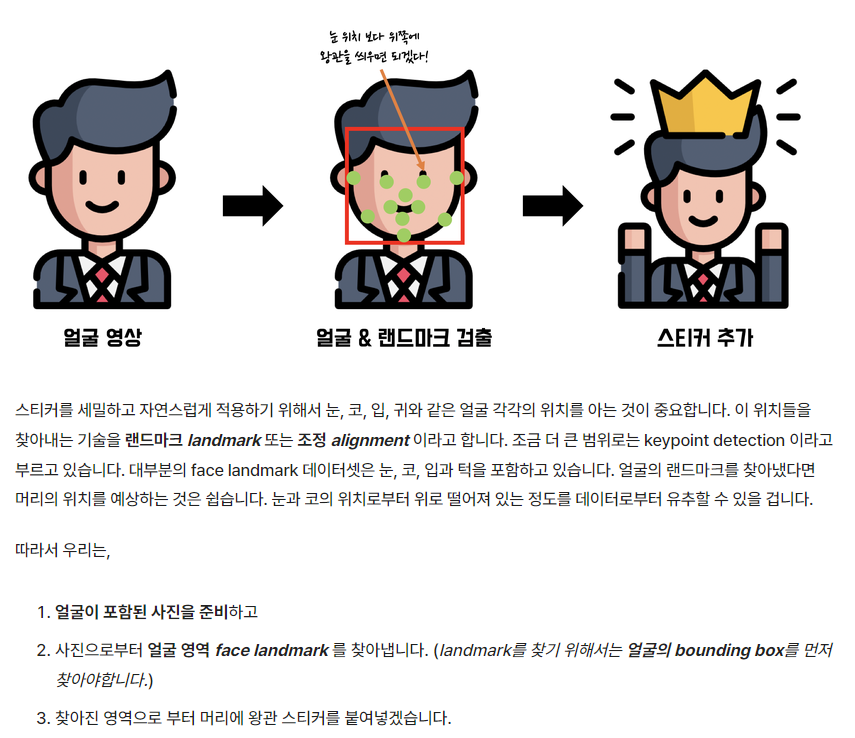

In [5]:
img_path = os.getenv("HOME")+'/content/drive/MyDrive/Exploration/Exploration_7/2022-10-07 12;14;10.PNG'
img_0 = Image.open(img_path)
img_0

In [6]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

# 사진 준비하기

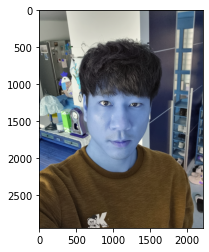

In [7]:
my_image_path = '/content/drive/MyDrive/Exploration/Exploration_7/data/images2/images_KDH2.png'
img_bgr = cv2.imread(my_image_path)   # OpenCV로 이미지를 불러온다
img_show = img_bgr.copy()             # 출력용 이미지 따로 보관
plt.imshow(img_bgr)                   # 이미지를 출력하기 위해 출력할 이미지를 올려준다.(실제 출력은 하지 않음)
plt.show() 

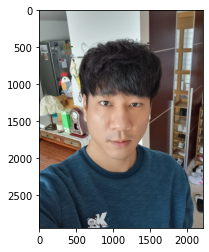

In [8]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv 는 BGR(파랑,녹색,빨강) 순이다. 그래서 색깔 보정처리를한다.(RGB : 빨강,녹색,파랑)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출

In [9]:
# dlib의 face detector 는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용하여 얼굴을 찾는다.

detector_hog = dlib.get_frontal_face_detector()  # detector를 선언. 기본 얼굴 감지기를 반환

# detector_hog를 이용해서 얼굴의 bounding box를 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

dlib_rects = detector_hog(img_rgb,1)
# (imgage, num of image pyramid) / 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있다.
# 더 정확한 검출 가능.
# num of pyramid 1일 때 : rectangles[[(617, 1043) (1575, 2002)]]
# num of pyramid 2일 때 : rectangles[] 출력되지 않음.(확대불가) 

rectangles[[(617, 1043) (1575, 2002)]]


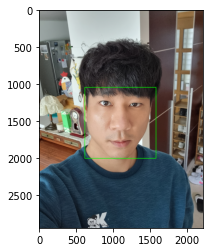

In [10]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴을 찾을 수 있다.

print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
  l = dlib_rect.left()  # 왼쪽
  t = dlib_rect.top()   # 위쪽
  r = dlib_rect.right() # 오른쪽
  b = dlib_rect.bottom() # 아래쪽

  cv2.rectangle(img_show, (l,t),(r,b), (0,255,0), 6, lineType=cv2.LINE_AA)
  # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
  # 순서대로, (이미지, 좌상단 좌표, 우하단좌표, 네모색, 네모두께, 라인타입)

  img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img_show_rgb)
  plt.show()

# 얼굴 랜드마크 face landmark

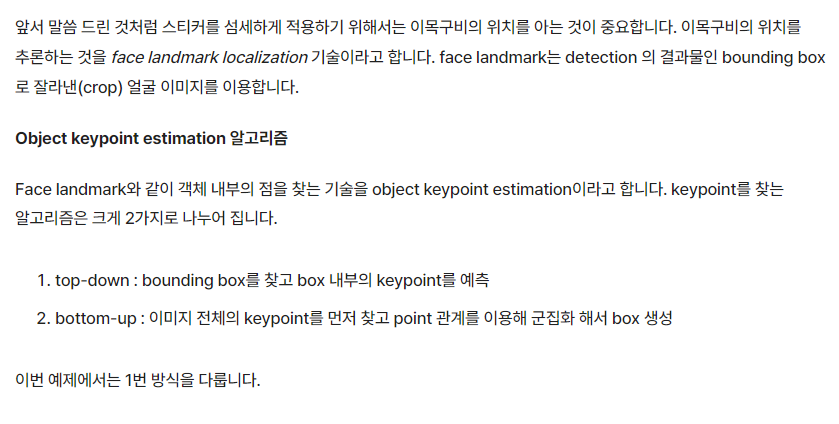

In [11]:
img_path = os.getenv("HOME")+'/content/drive/MyDrive/Exploration/Exploration_7/2022-10-07 14;08;34.PNG'
img_1 = Image.open(img_path)
img_1

In [12]:
# Dlib의 제공되는 모델을 사용(ibug 300-W으로 학습한 pretrained model)
# 학습 알고리즘은 regression tree 앙상블 사용

model_path = '/content/drive/MyDrive/Exploration/Exploration_7/data/models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러온다.
# landmark_predictor는 RGB이미지와 dlib.rectangle을 입력 받고 dlib.full_object_detection을 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

# landmark_predictor 는 'RGB 이미지' 와 'dlib.rectangle'을 입력받아 dlib.full_object_detection을 반환한다.
# 즉, 이미지에 초록색 box를 만들고 그 안에 눈,코,입 등 얼굴의 포인트(랜드마크)를 만들어낸다.

In [13]:
list_landmarks = []   # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스마다 face landmark를 찾아낸다.
# face landmark 좌표를 저장
for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)    # 모든 landmark의 위치정보를 points 변수에 저장
  list_points = list(map(lambda p: (p.x, p.y), points.parts()))  # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
  list_landmarks.append(list_points)     # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
  # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고 (지금하는 이미지는 1개의 얼굴이므로 1개의 원소를 갖는다.)
  # 각 원소는 68개의 랜드마크 위치가 나열된 list
  # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [14]:
list_landmarks

[[(638, 1215),
  (641, 1349),
  (649, 1483),
  (670, 1608),
  (718, 1723),
  (783, 1828),
  (866, 1917),
  (959, 1984),
  (1067, 2007),
  (1170, 1991),
  (1251, 1921),
  (1321, 1835),
  (1383, 1733),
  (1434, 1621),
  (1469, 1503),
  (1494, 1374),
  (1495, 1245),
  (729, 1162),
  (789, 1110),
  (875, 1103),
  (960, 1131),
  (1032, 1171),
  (1184, 1182),
  (1258, 1154),
  (1335, 1140),
  (1410, 1150),
  (1456, 1200),
  (1112, 1285),
  (1116, 1385),
  (1120, 1483),
  (1124, 1583),
  (999, 1614),
  (1052, 1633),
  (1108, 1650),
  (1160, 1634),
  (1208, 1615),
  (820, 1257),
  (873, 1239),
  (933, 1248),
  (980, 1292),
  (924, 1296),
  (864, 1290),
  (1219, 1303),
  (1267, 1268),
  (1323, 1265),
  (1370, 1284),
  (1329, 1309),
  (1271, 1311),
  (934, 1764),
  (1005, 1759),
  (1064, 1749),
  (1105, 1764),
  (1144, 1748),
  (1183, 1756),
  (1225, 1768),
  (1179, 1817),
  (1138, 1839),
  (1100, 1842),
  (1057, 1839),
  (998, 1816),
  (961, 1769),
  (1063, 1785),
  (1105, 1790),
  (1141, 1783)

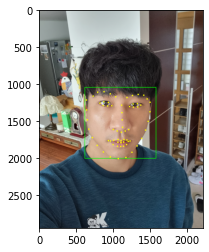

In [15]:
# list_landmarks 의 원소가 1개 이므로 아래 반복문은 한번만 실행된다.
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_show,point, 10, (0,255,255), -1)
      # cv2.circle: OpenCV의 원을 그리는 함수
      # img_show 이미지 위에 각각의 point에 
      # 크기가 2이고 (0,255,255)색으로 내부가 채워진(-1) 원을 그린다.
      # (마지막 인수가 자연수라면 그 만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용하기

In [16]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었다.
# dlib_rects: 얼굴 영역을 저장하고 있는 값

# list_landmarks: 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(638, 1215),(641, 1349),(649, 1483),(670, 1608),(718, 1723),(783, 1828),(866, 1917),(959, 1984),(1067, 2007),(1170, 1991),
# (1251, 1921),(1321, 1835),(1383, 1733),(1434, 1621),(1469, 1503),(1494, 1374),(1495, 1245),(729, 1162),(789, 1110),(875, 1103),
# (960, 1131),(1032, 1171),(1184, 1182),(1258, 1154),(1335, 1140),(1410, 1150),(1456, 1200),(1112, 1285),(1116, 1385),(1120, 1483),
# (1124, 1583),(999, 1614),(1052, 1633),(1108, 1650),(1160, 1634),(1208, 1615),(820, 1257),(873, 1239),(933, 1248),(980, 1292),(924, 1296),
# (864, 1290),(1219, 1303),(1267, 1268),(1323, 1265),(1370, 1284),(1329, 1309),(1271, 1311),(934, 1764),(1005, 1759),(1064, 1749),(1105, 1764),
# (1144, 1748),(1183, 1756),(1225, 1768),(1179, 1817),(1138, 1839),(1100, 1842),(1057, 1839),(998, 1816),(961, 1769),(1063, 1785),(1105, 1790),
# (1141, 1783),(1201, 1773),(1139, 1782),(1102, 1791),(1061, 1786)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
  #얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행

  print(landmark[30]) # 코의 index는 30
  x = landmark[30][0] # 이미지에서 코 부위의 x 값
  y = landmark[30][1] # 이미지에서 코 부위의 y 값
      
  w = h = dlib_rect.width() 
  # 얼굴 영역의 가로를 차지하는 픽셀의 수
  # max(x) - min(x) +1 : 픽셀의 수 이기 때문에 1을 더해준다. 픽셀 수는 점 하나로도 1이 된다.

  print('(x,y) : (%d,%d)'%(x,y))
  print('(w,h) : (%d,%d)'%(w,h))

(1124, 1583)
(x,y) : (1124,1583)
(w,h) : (959,959)


In [17]:
sticker_path = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_7/data/images2/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) 
# 스티커 이미지 조정 -> w,h는 얼굴 영역의 가로를 차지하지는 픽셀의 수// cv2.resize(image 객체 행렬, (가로 길이, 세로길이))
# 즉, 초록색 박스의 크기로 맞춰준다.

print(img_sticker.shape)  # 사이즈를 조정한 고양이수염 이미지의 차원 확인

(959, 959, 3)


In [18]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값
# x 는 이미지에서 코 부위의 x 값 = 1124
# y 는 이미지에서 코 부위의 y 값 = 1583
# w 는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 959
# y 는 얼굴 영역의 세로를 차지하는 픽셀의 수 = 959

refined_x = x - w // 2       # 1124 - (959 // 2) = 1124 - 479 = 645  --> 즉, 고양이 수염의 이미지 시작점 (가로)
refined_y = y - h // 2       # 1583 - 479 = 1104                     --> 고양이 수염의 이미지 시작점(세로)
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x,y 좌표를 조정한다. 
# 이미지 시작점은 top-left 좌표이다.

print('(x,y) : (%d,%d)'%(refined_x, refined_y))
# 음수 발생은 이미지 범위를 벗어남을 의미한다.
# opencv는 ndarray 데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라줘야 한다.

(x,y) : (645,1104)


In [19]:
# 고양이 수염 이미지가 이미지 밖에서 시작하지 않도록 조정
# 좌표 순서가 y,x임에 유의 (y,x,rgb chnnel)
# ndarray 는 행렬값을 불러오므로, x좌표는 열을 뜻하고 y좌표는 행을 뜻하기 떄문이다.

# 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나온다.
# 음수 값 만큼 고양이 수염이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

if refined_x < 0:
  img_sticker = img_sticker[:, -refined_x:]
  refined_x = 0

# 고양이 수염 이미지를 씌우기 위해 고양이 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
  img_sticker = img_sticker[-refined_y:,:]
 
  refined_y = 0

print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (645,1104)


In [20]:
# stiocker_area는 원본이미지에서 스티커를 적용할 위치를 crop(잘나낸)한 이미지 이다.
# 좌표의 순서가 y,x 임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 고양이 수염 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용한다.
# 고양이 수염 이미지에서 0이 나오는 부분은 흰색이라는 뜻으로 이미지가 없다는 소리다.

# 그렇기 때문에 0인 부분(이미지가없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지이다.
# 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고, 나머지 부분은 스티커로 채워주면 됨

# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법

# 아래 코드에서는 img_sticker가 0일 경우(고양이 수염 이미지에서 고양이 수염 부분 제외한 나머지 이미지)에는 
# sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(고양이 수염)를 적용한다.



In [21]:
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

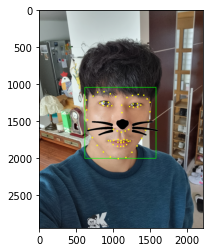

In [22]:
# 고양이 수염 이미지를 적용한 이미지

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

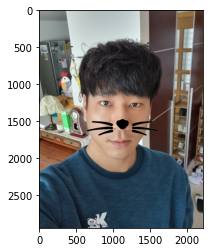

In [23]:
# bounding box와 landmark를 제거하고 최종 결과만 출력.
# img_show 대신, img_bgr 을 활용

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
# img_bgr 은 사진 준비시에 rgb 로만 적용해 놓은 원본 이미지이다.

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 회전하여 스티커 적용

(1104.0, 1472.0)


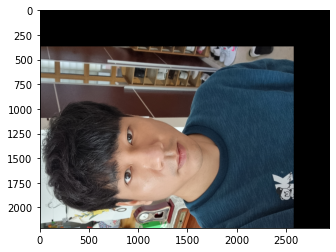

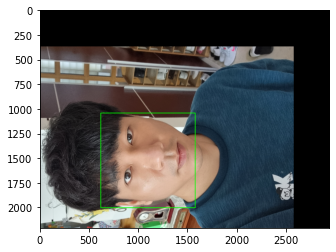

<Landmark result : Fail>


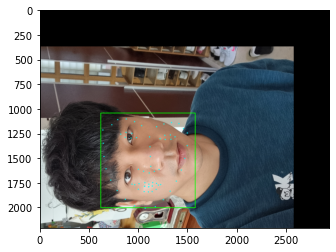

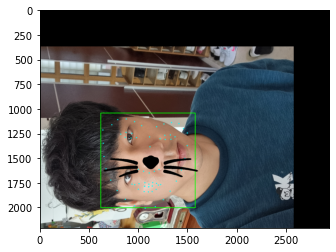

In [26]:
#새 이미지 기져오기 
img_bgr_rotation = img_rgb.copy()

plt.imshow(img_bgr_rotation)
plt.show

#이미지 회전시키기
width, height = img_bgr_rotation.shape[:2] #(1080, 1080)
cp = (img_bgr_rotation.shape[1] / 2, img_bgr_rotation.shape[0] / 2) #회전 중심축 좌표 설정
print(cp)

img_rot = cv2.getRotationMatrix2D(cp, 90, 1) 
img_rot_dst = cv2.warpAffine(img_bgr_rotation,img_rot,(width,height))

plt.imshow(img_rot_dst)
plt.show()



for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
  l = dlib_rect.left()  # 왼쪽
  t = dlib_rect.top()   # 위쪽
  r = dlib_rect.right() # 오른쪽
  b = dlib_rect.bottom() # 아래쪽

  cv2.rectangle(img_rot_dst, (l,t),(r,b), (0,255,0), 6, lineType=cv2.LINE_AA)
  # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
  # 순서대로, (이미지, 좌상단 좌표, 우하단좌표, 네모색, 네모두께, 라인타입)
plt.imshow(img_rot_dst)
plt.show()

list_landmarks_rot = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_rot.append(list_points)

for landmark in list_landmarks_rot:
    for point in landmark:
        cv2.circle(img_rot_dst, point, 6, (0, 255, 255), -1)
print("<Landmark result : Fail>")
plt.imshow(img_rot_dst)
plt.show()


#회전된 이미지에 스티커 삽입

sticker_area = img_rot_dst[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rot_dst[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker, sticker_area).astype(np.uint8)

plt.imshow(img_rot_dst)
plt.show()

# 선글라스 착용 및 거리 조절

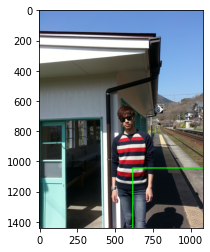

In [29]:
my_image_path_2 = os.getenv('HOME')+'/content/drive/MyDrive/Exploration/Exploration_7/data/images2/images_KDH.png'
img_2 = cv2.imread(my_image_path_2)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

# bounding box
for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_2, (l,t), (r,b), (0,255,0), 6, lineType=cv2.LINE_AA)

plt.imshow(img_2)
plt.show()

# 결론 및 느낀점

다양한 이미지에 넣은 다음, 다음과 같은 결론을 낸다.

1. 거리문제 : bounding box 를 찾는 부분부터 문제가 있다. 더 많은 학습이 이루어져야한다.(dlib_rects 개선 필요)
2. 각도문제 : 스티커는 얼굴이 틀어지는 각도에 따라 스티커 또한 기울어져야 한다.

해결 방안제시 
1. 비율문제는 다음과 같이 해결한다.\
1) 비율문제는 더 많은 학습을 통해 거리가 멀어져도 bounding box 를 제대로 적용할 수 있게끔 해야한다. 또한, 선글라스를 착용한 사진으로 프로젝트를 진행해보았는데, 예제에서 대상이 안경을 쓰고도 진행된 점을 감안한다면, 충분히 이 부분도 제대로 학습되리라 생각한다.

2. 각도문제는 다음과 같이 해결한다.\
1) 왕관의 예시와 같이 포인트(랜드마크)의 좌,우 눈썹의 각도와 같이 맞춰준다.
2) 좌,우 눈썹의 최 상단 좌표를 일직선을 긋고 cos(코사인)을 구하여 스티커에 똑같이 각도를 적용한다.

남아 있는 문제점
- 위 문제 중 각도문제에 있어서 고개를 기울이는 방법이 아닌 왼쪽 또는 오른쪽으로 돌리거나, 위로 들거나 아래로 숙일때의 경우가 있을 수 있다.
이때는 얼굴 인식 후 포인트(랜드마크)가 그려진다는 가정하에, 스티커를 3D 로 표현이 가능해져야 할 것이라 예상된다.

추가 학습 인지현황
- 예제에서는 스티커의 y 좌표를 코의 y좌표를 기준으로 스티커의 위치를 잡는다. 이렇게 기준으로 잡는 경우와 같이, 고개를 기울기는 경우에도 코에서 눈썹높이까지의  x, y 좌표의 기울기로 스티커의 기울기를 조절하여도 
될 것 같다.